# CartPole Environment

Evaluate the performance of diffrence DeepRL algorithms on CartPole environment. Each algorithm utilizes a simple shallow neural network with a minimal number of trainable parameters.

In [1]:
import gym
import matplotlib.pyplot as plt

### DQN Algorithm

2022-01-09 00:22:12,523 - deepRL - INFO - Initializing training
Cumulative reward 163.0: 100%|██████████| 150000/150000 [03:30<00:00, 712.87it/s]


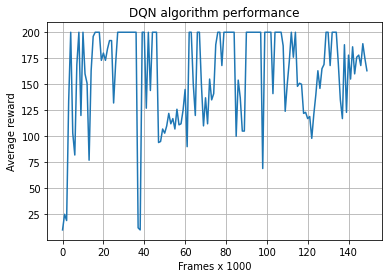

In [3]:
from small_experiment_utils.models import SimpleDQN
from diploma_framework.algorithms import DQN

env = gym.make('CartPole-v0')
model = SimpleDQN(env.observation_space.shape[0], env.action_space.n)

alg = DQN(environment=env,
          model=model,
          sync_freq=1000,
          lr=1e-03,
          memory_size=2000,
          batch_size=128,
          max_frames=150_000,
          epsilon_start=1.0,
          epsilon_end=0.0,
          epsilon_decay=250,
          gamma=0.9)

rewards_dqn, _ = alg.run(eval_window=1000,
                  n_evaluations=10,
                  early_stopping=False,
                  reward_threshold=197.5)


plt.figure()
plt.plot(rewards_dqn)
plt.ylabel('Average reward')
plt.xlabel('Frames x 1000')
plt.title('DQN algorithm performance')
plt.grid()
plt.savefig('CartPole_DQN', dpi=500)

### REINFORCE Algorithm

2022-01-09 00:25:49,972 - deepRL - INFO - Initializing training
Cumulative reward 183.9: 100%|██████████| 150000/150000 [01:33<00:00, 1605.89it/s]


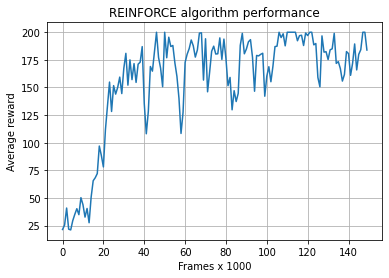

In [4]:
from small_experiment_utils.models import SimpleReinforce
from diploma_framework.algorithms import Reinforce

env = gym.make('CartPole-v0')
model = SimpleReinforce()

alg = Reinforce(environment=env,
          model=model,
          lr=1e-03,
          max_frames=150_000,
          num_steps=200,
          gamma=0.99)

rewards_rein, _ = alg.run(eval_window=1000,
                  n_evaluations=10,
                  early_stopping=False,
                  reward_threshold=197.5)

plt.figure()
plt.plot(rewards_rein)
plt.ylabel('Average reward')
plt.xlabel('Frames x 1000')
plt.title('REINFORCE algorithm performance')
plt.grid()
plt.savefig('CartPole_Reinforce', dpi=500)

### A3C Algorithm

2022-01-09 00:20:42,075 - deepRL - INFO - Initializing training
  0%|          | 0/150000 [01:20<?, ?it/s], 1895.74it/s]                          


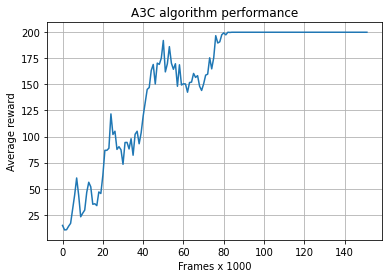

In [2]:
from small_experiment_utils.models import ActorCritic
from diploma_framework.algorithms import A3C

env = gym.make('CartPole-v0')
model = ActorCritic()

alg = A3C(environment=env,
          model=model,
          n_workers=32,
          lr=1e-03,
          max_frames=150_000,
          num_steps=200,
          actor_weight=1,
          critic_weight= 0.1,
          gamma=0.99)

rewards_a3c, _, _, _ = alg.run(eval_window=1000,
                                n_evaluations=10,
                                early_stopping=False,
                                reward_threshold=197.5)

plt.figure()
plt.plot(rewards_a3c)
plt.ylabel('Average reward')
plt.xlabel('Frames x 1000')
plt.title('A3C algorithm performance')
plt.grid()
plt.savefig('CartPole_A3C', dpi=500)

### PPO Algorithm

2022-01-09 00:27:31,284 - deepRL - INFO - Initializing training
Cumulative reward 200.0: 100%|██████████| 150000/150000 [06:23<00:00, 391.22it/s]


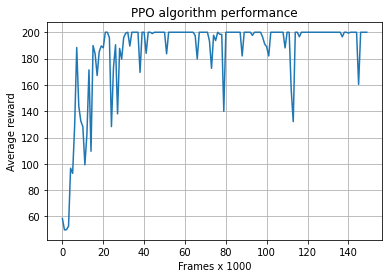

In [5]:
from small_experiment_utils.models import ActorCritic
from diploma_framework.algorithms import PPO

env = gym.make('CartPole-v0')
model = ActorCritic()

alg = PPO(environment=env,
          model=model,
          lr=1e-03,
          batch_size=4,
          epochs=4,
          max_frames=150_000,
          num_steps=150,
          clip_param=0.2,
          gamma=0.99,
          lamb= 1,
          actor_weight=1,
          critic_weight=0.5,
          entropy_weight=0.001)

rewards_ppo, _ = alg.run(eval_window=1000,
                    n_evaluations=10,
                    early_stopping=False,
                    reward_threshold=197.5)

plt.figure()
plt.plot(rewards_ppo)
plt.ylabel('Average reward')
plt.xlabel('Frames x 1000')
plt.title('PPO algorithm performance')
plt.grid()
plt.savefig('CartPole_PPO', dpi=500)

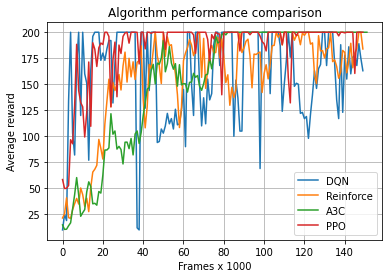

In [6]:
plt.figure()
plt.plot(rewards_dqn)
plt.plot(rewards_rein)
plt.plot(rewards_a3c)
plt.plot(rewards_ppo)
plt.legend(['DQN', 'Reinforce', 'A3C', 'PPO'])
plt.grid()
plt.ylabel('Average reward')
plt.xlabel('Frames x 1000')
plt.title('Algorithm performance comparison')

plt.savefig('CartPole_comparison', dpi=500)


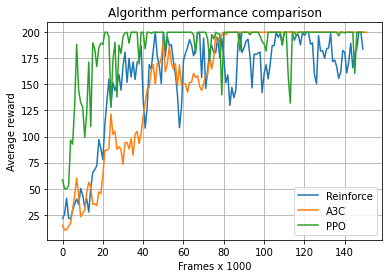

In [8]:
plt.figure()
plt.plot(rewards_rein)
plt.plot(rewards_a3c)
plt.plot(rewards_ppo)
plt.legend(['Reinforce', 'A3C', 'PPO'])
plt.grid()
plt.ylabel('Average reward')
plt.xlabel('Frames x 1000')
plt.title('Algorithm performance comparison')

plt.savefig('CartPole_finalists', dpi=500)